In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import svg
from hehe2 import *
from IPython.display import SVG, display

In [12]:
def show_svg(canvas: svg.SVG):
    display(SVG(str(canvas)))

In [13]:
def test_ValuedPath_func_via_pv(num_tests=100, len_pv=10):
    for _ in range(num_tests):
        pv = coreli.ParityVector.get_random_parity_vector(len_pv)
        a, b = pv.first_occurrence()
        vap = ValuedPath.from_parity_vector(pv)
        assert(vap.func().subs(vap.x,a) == b)
test_ValuedPath_func_via_pv()

In [146]:
def test_world_read_via_pv(num_tests=1000, len_pv=10):
    for _ in range(num_tests):
        pv = coreli.ParityVector.get_random_parity_vector(len_pv)
        vap = ValuedPath.from_parity_vector(pv)
        world2 = World()
        world2.place_initial_valued_path(vap)
        top = world2.read(['→']*len_pv, pos=(-1*len_pv,0), compute_missing=True)
        k = pv.odd_len()
        top_str = "".join(list(map(lambda x: str(x), top)))
        a = int(top_str,2)
        if k == 0:
            assert(a == 0)
            return
        
        left = world2.read(['↓']*k, pos=(-1*len_pv,0), compute_missing=True)
        left_str = "".join(list(map(lambda x: str(x), left)))
        b = int(left_str,3)
        assert(coreli.iterate(coreli.T, len_pv, a) == b)
test_world_read_via_pv()

In [147]:
pv = coreli.ParityVector([0, 0, 1, 0, 1, 1, 1, 1, 1, 0])
vap = ValuedPath.from_parity_vector(pv)
world = World()
world.place_initial_valued_path(vap)
world.read(['→']*10, pos=(-10,0), compute_missing=True)
left = world.read(['↓']*k, pos=(-10,0), compute_missing=True)

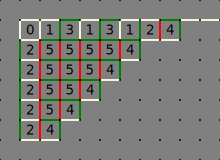

In [148]:
canvas = draw_world_svgpy(world.world)
show_svg(canvas)